# 1、data extract

In [4]:
import json

In [8]:
import re
def remove_url(text):
    '''
    args:
        text: the tweet text
    return:
        new_text: tweet text removed the url
    '''
    URL_REGEX = URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    url_lists = re.findall(URL_REGEX,text)
    for url in url_lists:
        new_text = text.replace(url,'')
        text = new_text
    return text

In [19]:
# remove english stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer(strip_handles=True)
stopwords = set(stopwords.words('english'))

def remove_stopwords(data):
    """
    args: 
        data:  text while text include source text and reply text
        
    return:
        result: text while text include source text and reply text(remove the stopwords)
    """
    res = ''
    for word in tt.tokenize(data):
        if word.lower().strip() in stopwords:
            continue
        else:
            res += ' '+word.lower()
    return res

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangyibo06/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def prepare_data(filename):
    """
    args: 
        data: {user_id:{"text":text,"user":user,"place_id":place_id}}
     
    return:
        result: {text: [text1,text2,...],length:[length1,length2,...],label:[rumor or not,...] } 
    """
    with open(filename, 'r') as obj:
        for line in obj.readlines():
            data = json.loads(line)
    result = {}
    text = []
    textlabel = []
    length = []
    for user_id in data.keys():
        text.append(data[user_id]['text'])
        textlabel.append(data[user_id]['place_id']) 
        length.append(len(data[user_id]['text']))
    result['text'] = text
    result['length'] = length
    result['label'] = textlabel
    return result

In [6]:
def prepare_data_rmurl(filename):
    """
    args: 
        data: {user_id:{"text":text,"user":user,"place_id":place_id}}
     
    return:
        result: {text: [text1,text2,...],length:[length1,length2,...],label:[rumor or not,...] } 
    """
    with open(filename, 'r') as obj:
        for line in obj.readlines():
            data = json.loads(line)
    result = {}
    text = []
    textlabel = []
    length = []
    for user_id in data.keys():
        text.append(remove_url(data[user_id]['text']))
        textlabel.append(data[user_id]['place_id']) 
        length.append(len(remove_url(data[user_id]['text'])))
    result['text'] = text
    result['length'] = length
    result['label'] = textlabel
    return result

In [20]:
def prepare_data_rmsp(filename):
    """
    args: 
        data: {user_id:{"text":text,"user":user,"place_id":place_id}}
     
    return:
        result: {text: [text1,text2,...],length:[length1,length2,...],label:[rumor or not,...] } 
    """
    with open(filename, 'r') as obj:
        for line in obj.readlines():
            data = json.loads(line)
    result = {}
    text = []
    textlabel = []
    length = []
    for user_id in data.keys():
        text.append(remove_stopwords(remove_url(data[user_id]['text'])))
        textlabel.append(data[user_id]['place_id']) 
        length.append(len(remove_stopwords(remove_url(data[user_id]['text']))))
    result['text'] = text
    result['length'] = length
    result['label'] = textlabel
    return result

In [21]:
file = './train_dev_data/0905_1005.txt'
train_dev = prepare_data(file)
demo = prepare_data_rmurl(file)
demo_sp = prepare_data_rmsp(file)

# 2、data analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_dev_df = pd.DataFrame(train_dev)
train_dev_df.head()

,text,length,label
0,Just posted a photo @ West End https://t.co/se...,54,4
1,"Just posted a photo @ Caulfield North, Victori...",2384,3
2,WATERCOLOUR ART CLASSES ONLINE Thursday 9 Sep...,280,1
3,Just posted a photo @ Centennial Parklands htt...,1641,1
4,Just posted a photo @ Richmond Hill Angus http...,264,11


In [12]:
demo_df = pd.DataFrame(demo)
demo_df.head()

,text,length,label
0,Just posted a photo @ West End,31,4
1,"Just posted a photo @ Caulfield North, Victori...",1707,3
2,WATERCOLOUR ART CLASSES ONLINE Thursday 9 Sep...,177,1
3,Just posted a photo @ Centennial Parklands po...,970,1
4,Just posted a photo @ Richmond Hill Angus 202...,188,11


In [22]:
demo_sp_df = pd.DataFrame(demo_sp)
demo_sp_df.head()

,text,length,label
0,posted photo @ west end,24,4
1,"posted photo @ caulfield north , victoria #po...",1202,3
2,watercolour art classes online thursday 9 sep...,173,1
3,posted photo @ centennial parklands posted ph...,892,1
4,posted photo @ richmond hill angus 2020 drop ...,133,11


/Users/wangyibo06/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


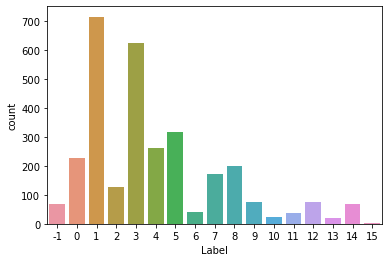

In [19]:
## check the labels in train_dev data
plt.figure()
sns.countplot(train_dev_df.label)
plt.xlabel('Label',size = 10)
plt.xticks(size = 10)
plt.show()

In [24]:
#split the train_dev dataset
from sklearn.model_selection import train_test_split
x_processed = train_dev_df['text']
y_processed = train_dev_df['label']
x_train,x_dev,y_train,y_dev = train_test_split(x_processed,y_processed,test_size = 0.3,stratify = y_processed,random_state = 22)

In [29]:
print(len(x_train))
print(len(x_dev))
print(y_train.head())

2132
915
121     1
1473    0
1741    4
2189    5
2666    1
Name: label, dtype: int64


/Users/wangyibo06/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


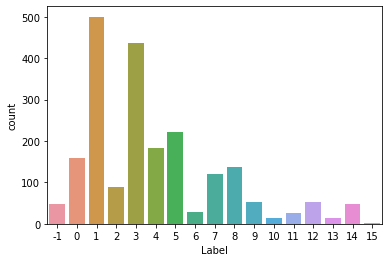

In [30]:
## check the labels in train data
plt.figure()
sns.countplot(y_train)
plt.xlabel('Label',size = 10)
plt.xticks(size = 10)
plt.show()

/Users/wangyibo06/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


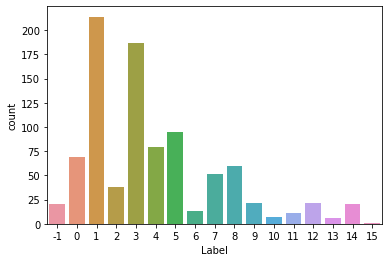

In [31]:
## check the labels in dev data
plt.figure()
sns.countplot(y_dev)
plt.xlabel('Label',size = 10)
plt.xticks(size = 10)
plt.show()

In [32]:
## analyze the distribution of words in the train data
print(train_dev_df.text.describe())

count                                                  3047
unique                                                 3047
top       Where two oceans meets 🌊\n#tbt #travelphotogra...
freq                                                      1
Name: text, dtype: object


In [52]:
label_length = []
labels = []
for i in range(-1,16):
    df=train_dev_df[train_dev_df.label== i]['length']
    label_length.append(df)
    labels.append(str(i))

In [1]:
# print(label_length)
# print(labels)

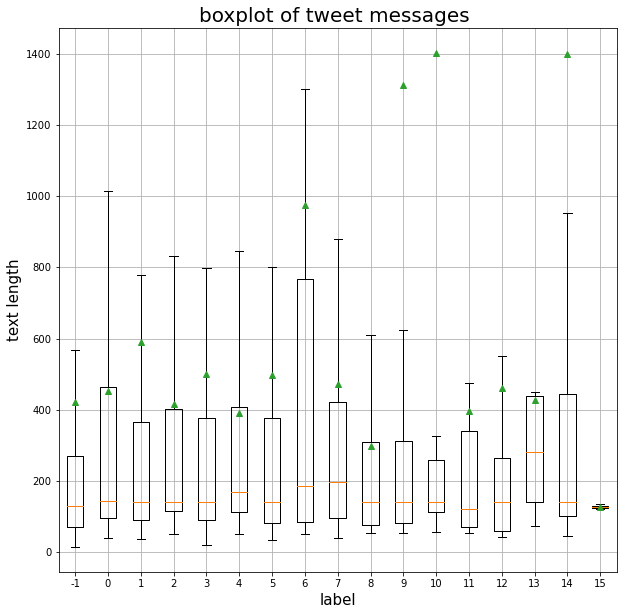

In [60]:
## analyze the length of each label in the 
import matplotlib.pyplot as plt
# plt.rcParams["font.sans-serif"]=["SimHei"]
figure=plt.figure(figsize=(10,10))#figure size
plt.title('boxplot of tweet messages ',fontsize=20)#title and size
#show the means and ignore the fliers
plt.boxplot(label_length,labels=labels,showmeans=True,showfliers=False)
plt.xlabel('label',fontsize=15)
plt.ylabel('text length',fontsize=15)
plt.grid()
plt.show()

In [16]:
demo_label_length = []
demo_labels = []
for i in range(-1,16):
    df=demo_df[demo_df.label == i]['length']
    demo_label_length.append(df)
    demo_labels.append(str(i))

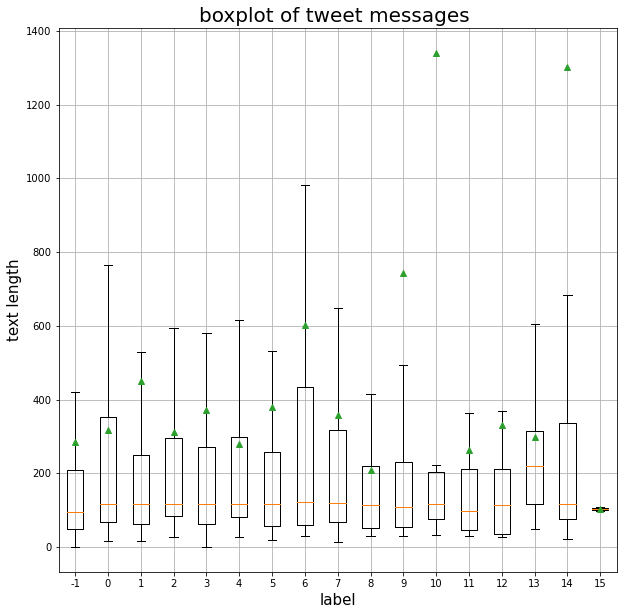

In [17]:
## analyze the length of each label in the 
import matplotlib.pyplot as plt
# plt.rcParams["font.sans-serif"]=["SimHei"]
figure=plt.figure(figsize=(10,10))#figure size
plt.title('boxplot of tweet messages ',fontsize=20)#title and size
#show the means and ignore the fliers
plt.boxplot(demo_label_length,labels=demo_labels,showmeans=True,showfliers=False)
plt.xlabel('label',fontsize=15)
plt.ylabel('text length',fontsize=15)
plt.grid()
plt.show()

In [24]:
demo_sp_label_length = []
demo_sp_labels = []
for i in range(-1,16):
    df=demo_sp_df[demo_sp_df.label == i]['length']
    demo_sp_label_length.append(df)
    demo_sp_labels.append(str(i))

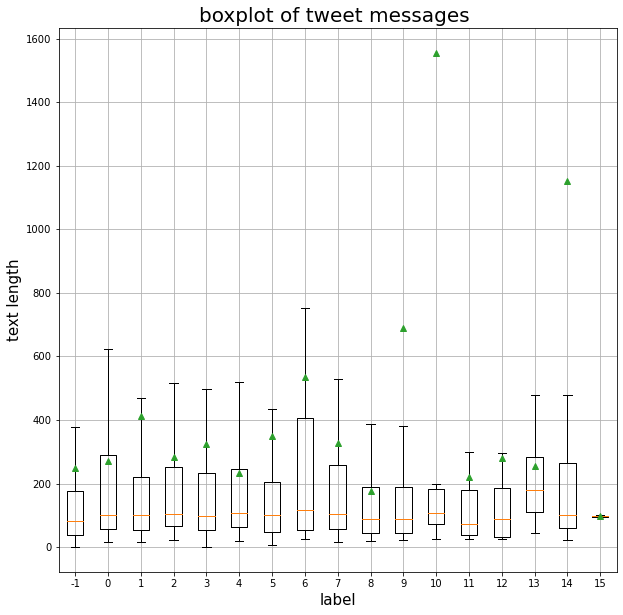

In [25]:
## analyze the length of each label in the 
import matplotlib.pyplot as plt
# plt.rcParams["font.sans-serif"]=["SimHei"]
figure=plt.figure(figsize=(10,10))#figure size
plt.title('boxplot of tweet messages ',fontsize=20)#title and size
#show the means and ignore the fliers
plt.boxplot(demo_sp_label_length,labels=demo_sp_labels,showmeans=True,showfliers=False)
plt.xlabel('label',fontsize=15)
plt.ylabel('text length',fontsize=15)
plt.grid()
plt.show()